Jarryd Webber U12100952

In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy
import itertools
import pandas

In [2]:
def time_parser(iterable_time):
    "This function takes a list of times formatted as YYYY-MM_DDTHH:MM:SS and returns a list of times passed since time 0"
    
    years = []
    months = []
    days = []
    hours = []
    minutes =[]
    seconds = []
    time_passed_list = []
    
    for time in iterable_time:
     
        years.append(int(time[:4]))
        months.append(int(time[5:7]))
        days.append(int(time[8:10]))
        hours.append(int(time[-8:-6]))
        minutes.append(int(time[-5:-3]))
        seconds.append(int(time[-2:]))
        
        if time == iterable_time[0]:
            time_passed_list.append(0)
        
        else:
            time_current = 24*60*days[-1] + 60*hours[-1] + minutes[-1] + seconds[-1]/60
            time_first = 24*60*days[0] + 60*hours[0] + minutes[0] + seconds[0]/60
            
            time_passed = time_current - time_first
            time_passed_list.append(time_passed)
            
    return (time_passed_list)

In [3]:
def pairer(iterable):
    "Creates an iterable object of pairs of values created from the input iterable list"
    
    a, b = itertools.tee(iterable)
    next (b, None)
    return zip(a, b)

In [4]:
def diff(var):
    "System Equations"
    t, c_span, c1_span, ci_span, step = var
    
#     print (int(-theta_1/step)-1, len(c_span)) # For debugging
    if t> theta_1:
        c1 = c_span[int(-theta_1/step)-1]
    else:
        c1 = 0
    
    if t> theta_2:
        c2 = c1_span[int(-theta_2/step)-1]
    else:
        c2 = 0
        
#     print (ci[-1], c1, c2)        # For debugging
    
    dcdt = 1/V * (q*ci_span[-1] + alpha*q*c2 - (1 + alpha)*q*c_span[-1] -V*k*c_span[-1])
    
    return dcdt, c1, c2

In [5]:
def Euler(time_span, ci_span, y0, func, plot_t, c_span, c1_span, c2_span, step = 0.01):
    "Euler Integration of the specified func, over the specified timespan, with a resulation of the specified step."
    
    ts = numpy.arange(time_span[0], time_span[-1], step)
    
    ci_span_with_interp = []
    
    index_total=0
        
    for t in ts:
        ci_span_with_interp.append(scipy.interp(t, time_span, ci_span))
        
        var = t, c_span, c1_span, ci_span_with_interp, step
        
        c_n = c_span[-1] + step*func(var)[0]
        
        c1_span.append(func(var)[1])
        c2_span.append(func(var)[2])
        
        c_span.append(c_n)
        
    plot_t = numpy.append(plot_t, ts)
    ts = numpy.append(ts, [time_span[-1]])
    
    return (ts, c_span, c1_span, c2_span, plot_t)

In [6]:
def approx(t_array):
    c1_list=[]
    for t in t_array:
        
        if t > 0.9:
            c1_list.append(400*(1 - 0.99174*numpy.exp(-(t-0.9)/25) - 0.00826*numpy.exp(-(t-0.9)/0.8)))
        else:
            c1_list.append(0)
            
    return c1_list

Initial conditions

In [7]:
V = 5 #m^3
alpha = 12
q = 0.05 #m^3/m
k = 0.04 #/min
theta_1 = 0.9 #min
theta_2 = 1.1 #min
c = 0

Values for approx method

In [8]:
theta_3 = theta_1 + theta_2
K = 0.2
tau = 20 #min

# Q2 Case

In [9]:
time_test = [0,100]
ci_test = [2000,2000]
y0 = c

In [10]:
q2_t = Euler(time_test, ci_test, y0, diff, [], [0], [0], [0])[0]
q2_c = Euler(time_test, ci_test, y0, diff, [], [0], [0], [0])[1]
q2_c1 = Euler(time_test, ci_test, y0, diff, [], [0], [0], [0])[2]

In [11]:
c1_approx = approx(q2_t)

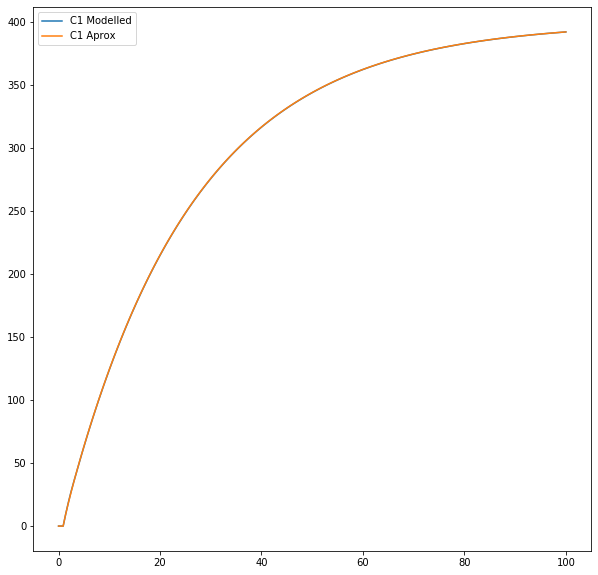

In [12]:
plt.figure(figsize = (10,10))
plt.plot(q2_t, q2_c1, label = "C1 Modelled")
plt.plot(q2_t, c1_approx, label = "C1 Aprox")
plt.legend(loc = "best")

#Both plots are there, they are just incredibly close together

# Q3

Below is data manipulation on the file to be read

In [13]:
time_string, ci_string = pandas.read_csv("data.csv")

In [14]:
time_raw, ci_raw = pandas.read_csv("data.csv")[time_string], pandas.read_csv("data.csv")[ci_string]

In [15]:
time_passed = time_parser(time_raw)

In [16]:
time_paired, ci_paired = pairer(time_passed), pairer(ci_raw)
# for t in time_paired:     # For debugging
#     print (t)

Creating my data set to plot for Q3

In [17]:
total_time = []
total_c = [0]
total_c1 = [0]
total_c2 = [0]

for time_pair, ci_pair in zip(time_paired, ci_paired):
#     print(time_pair)
    results = Euler(time_pair, ci_pair, 0, diff,total_time, total_c, total_c1, total_c2)
    
    total_c = results[1]
    total_c1 = results[2]
    total_c2 = results[3]
    total_time = results[4]
    
total_time = numpy.append(total_time, time_passed[-1])

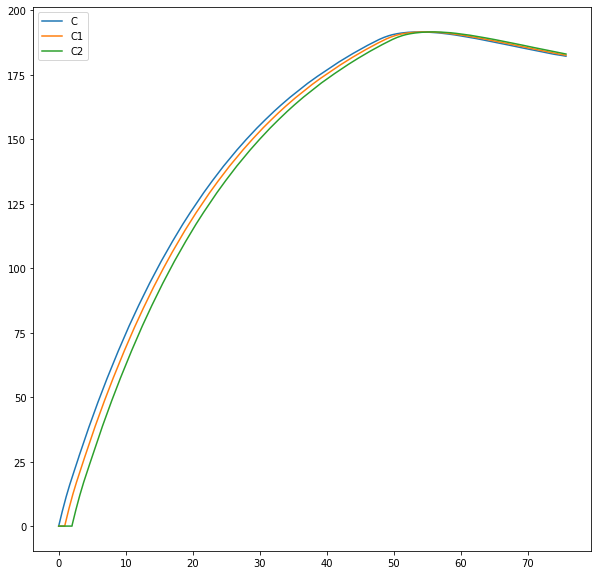

In [18]:
plt.figure(figsize = (10,10))
plt.plot(total_time, total_c, label = "C")
plt.plot(total_time, total_c1, label = "C1")
plt.plot(total_time, total_c2, label = "C2")
plt.legend(loc = "best")